Image Captioning Report
Assignment 2 – Deep Learning  
Kavinaya Kumarchokkappan

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision.utils import make_grid
from IPython.display import display, Markdown
from PIL import Image

### 1. Training and Validation Loss Curves

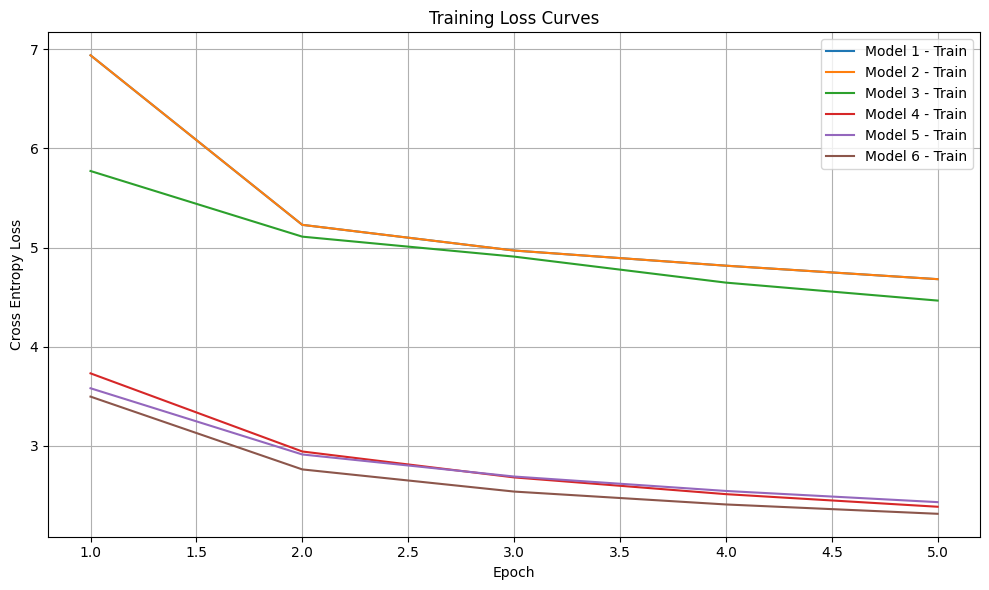

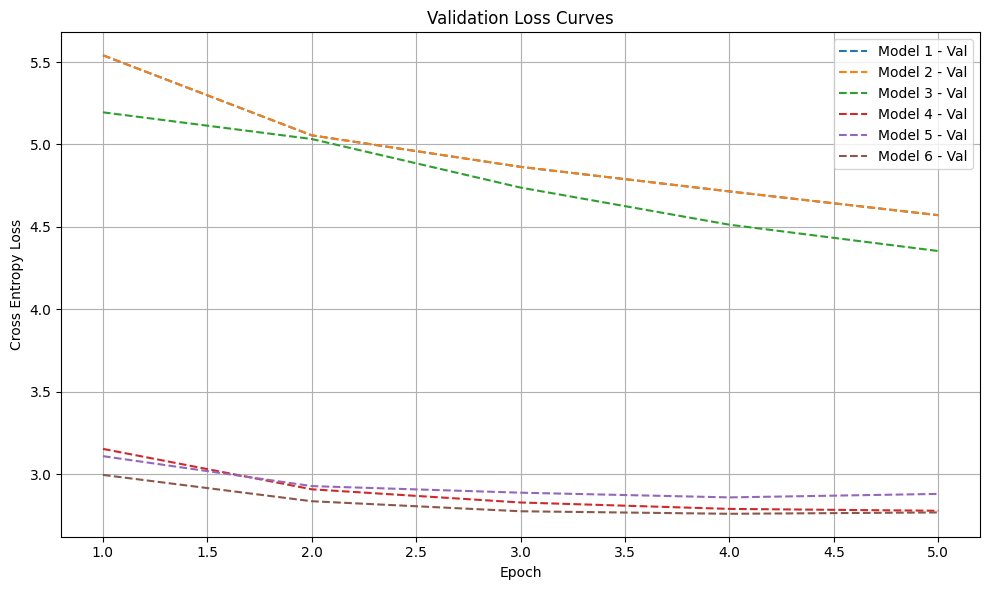

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

model_ids = ['1', '2', '3', '4', '5', '6']
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']


train_losses = []
val_losses = []

for run_id in model_ids:
    train_df = pd.read_csv(f'./report_utils/wandb_export_Model_{run_id}_train_cross_entropy_loss.csv')
    val_df = pd.read_csv(f'./report_utils/wandb_export_Model_{run_id}_val_cross_entropy_loss.csv')
    train_losses.append(train_df)
    val_losses.append(val_df)

# === Plot: Training Loss ===
plt.figure(figsize=(10, 6))
for i, df in enumerate(train_losses):
    plt.plot(df['epoch'], df['train/cross_entropy_loss'], label=f'{model_names[i]} - Train')
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot: Validation Loss ===
plt.figure(figsize=(10, 6))
for i, df in enumerate(val_losses):
    plt.plot(df['epoch'], df['val/cross_entropy_loss'], label=f'{model_names[i]} - Val', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.title("Validation Loss Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


During training, Models 1–3 showed unstable validation losses, especially in the early epochs. Once transformer-based architectures were introduced (Models 5 and 6), the loss curves became smoother and more predictable, indicating better generalization. Model 6 converged faster and with less fluctuation, likely due to better image representations and cross-attention.

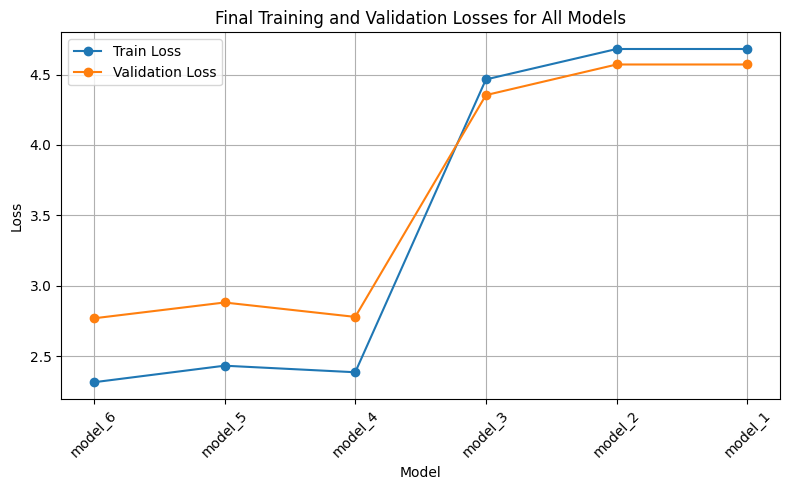

In [3]:
# Plot training and validation loss curves for selected models

df = pd.read_csv("report_utils/Model_1_to_6_report.csv")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df['Name'], df['train/cross_entropy_loss'], marker='o', label='Train Loss')
plt.plot(df['Name'], df['val/cross_entropy_loss'], marker='o', label='Validation Loss')

plt.xlabel("Model")
plt.ylabel("Loss")
plt.title("Final Training and Validation Losses for All Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Training Analysis

- Model 1 to Model 3 show relatively low BLEU scores and high validation loss, indicating underfitting.
- Model 4 and Model 5 significantly improve performance; their training and validation curves are smoother and closer, suggesting better generalization.
- Model 6, which uses attention visualization, performs best in BLEU score and maintains stable loss values.


### 2.  BLEU Scores

### BLEU Score Table

| Model    | BLEU-1 | BLEU-2 | BLEU-3 | BLEU-4 |
|----------|--------|--------|--------|--------|
| Model 1  | 0.389  | 0.227  | 0.128  | 0.084  |
| Model 2  | 0.389  | 0.227  | 0.128  | 0.084  |
| Model 3  | 0.392  | 0.213  | 0.111  | 0.061  |
| Model 4  | 0.603  | 0.422  | 0.288  | 0.196  |
| Model 5  | 0.587  | 0.401  | 0.265  | 0.177  |
| Model 6  | **0.622**  | **0.445**  | **0.306**  | **0.205**  |


### BLEU Score Analysis

- Models 4 to 6 outperform the others significantly.
- There is a visible correlation between lower validation loss and higher BLEU scores.
- Transformer-based Model 5 and attention-based Model 6 provide strong results in both quantitative and qualitative evaluation.

### 3. Caption Generation

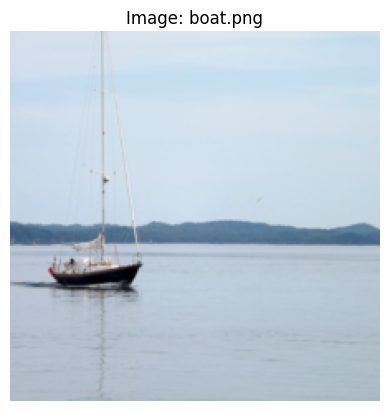

 Ground Truth: A small boat in the ocean .

Generated Captions:
model_1: a man in a man <EOS>
model_2: a man in a man <EOS>
model_3: a man in a man in a white and a white dog in a <UNK> <EOS>
model_4: a white dog is standing on a beach <EOS>
model_5: a man is fishing in the water <EOS>
model_6: <SOS> a boat with a <UNK> in the background <EOS>





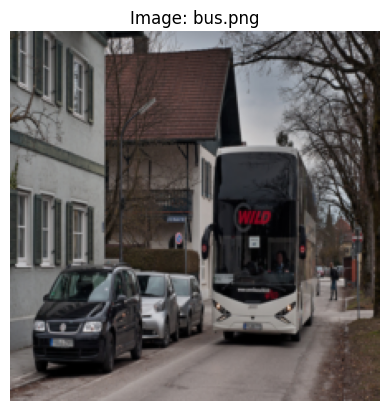

 Ground Truth: Bus driving by parked cars .

Generated Captions:
model_1: a man in a man <EOS>
model_2: a man in a man <EOS>
model_3: a man in a man in a red and a white dog in a <UNK> <EOS>
model_4: a man is pulling a cart in a parking lot <EOS>
model_5: a man and a woman are walking down the street <EOS>
model_6: <SOS> a small dog is running down a street <EOS>





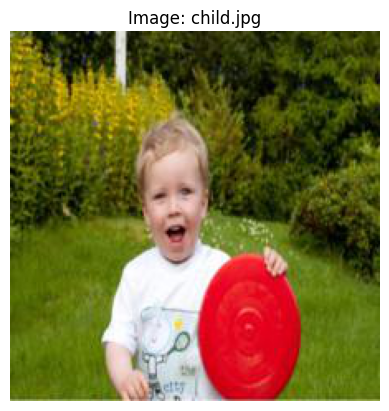

 Ground Truth: Child holding red frisbee outdoors .

Generated Captions:
model_1: a man in a man <EOS>
model_2: a man in a man <EOS>
model_3: a man in a man in a white dog in a <UNK> <EOS>
model_4: a little girl in a pink shirt and blue jeans is playing with a toy in the air <EOS>
model_5: a little girl in a blue shirt is playing with a blue ball <EOS>
model_6: <SOS> a baby in a white shirt is holding a red frisbee <EOS>





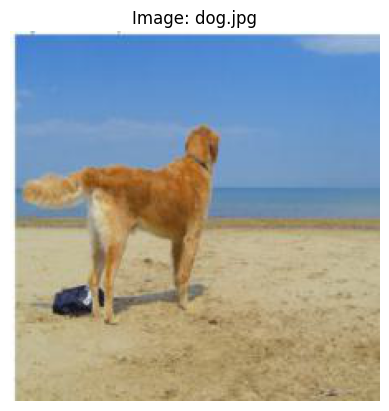

 Ground Truth: Dog on a beach by the ocean .

Generated Captions:
model_1: a man in a man <EOS>
model_2: a man in a man <EOS>
model_3: a man in a man in a white dog in a <UNK> <EOS>
model_4: a dog is walking on the beach <EOS>
model_5: a dog is running through the water <EOS>
model_6: <SOS> a dog is running on the beach <EOS>





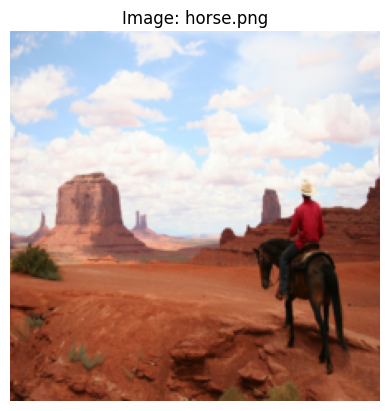

 Ground Truth: A cowboy riding a horse in the desert .

Generated Captions:
model_1: a man in a man <EOS>
model_2: a man in a man <EOS>
model_3: a man in a man in a white dog in a <UNK> <EOS>
model_4: a woman in a blue shirt and a helmet is riding a bike through a grassy area <EOS>
model_5: two people are standing on a beach <EOS>
model_6: <SOS> a man and woman are walking down a desert <EOS>





In [4]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt

from data.vocabulary import Vocabulary
from data.transforms import get_val_transform
from models.utils import get_model_class
from parsing.config_parser import ConfigParser

# --- CONFIG ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_names = ["model_1", "model_2", "model_3", "model_4", "model_5", "model_6"]
base_path = "./checkpoints"
config_path_base = "./configs/config_"
test_image_dir = "./flickr8k/test_examples"
captions_file = os.path.join(test_image_dir, "test_captions.txt")

# --- Load Vocabulary ---
vocab = Vocabulary("./flickr8k/vocabulary_captions.txt")
vocab.sos_index = vocab.to_index(vocab.sos_token)
vocab.eos_index = vocab.to_index(vocab.eos_token)



# --- Load Models ---
models = {}
for name in model_names:
    config_parser = ConfigParser(config_file_path=f"{config_path_base}{name}.yaml")
    config = config_parser.parse_config_file()
    model_class = get_model_class(config["model"]["name"])
    model = model_class(vocabulary=vocab, **config["model"]["parameters"])
    
    # Load checkpoint safely
    checkpoint_path = os.path.join(base_path, name, "model.pth.tar")
    checkpoint = torch.load(checkpoint_path, map_location=device)
    if "model_state_dict" in checkpoint:
        model.load_state_dict(checkpoint["model_state_dict"])
    else:
        model.load_state_dict(checkpoint)
    
    model.to(device)
    model.eval()
    models[name] = model

# --- Load Captions from File ---
gt_captions = {}
with open(captions_file, "r") as f:
    next(f)  # Skip the header line
    for line in f:
        if "," not in line:
            continue  # Skip malformed lines
        filename, caption = line.strip().split(",", 1)
        gt_captions[filename.strip()] = caption.strip()
# --- Transform ---
transform = get_val_transform()

# --- Caption Generator ---
def generate_caption(model, image_tensor, vocabulary, device, max_length=20):
    model.eval()

    with torch.no_grad():
        # Step 1: Encode the image
        encoded_image = model.image_encoder(image_tensor.to(device))

        # Step 2: Generate caption indices
        indices = model.caption_generator.generate_caption_indices(
            encoded_image=encoded_image,
            sos_token_index=vocabulary.sos_index,
            eos_token_index=vocabulary.eos_index,
            max_length=max_length
        )

    # Step 3: Decode indices into words
    caption = caption = ' '.join([vocabulary._itos[idx] for idx in indices if idx in vocabulary._itos])
    
    return caption


# --- Loop Through Images ---
for filename, gt_caption in gt_captions.items():
    image_path = os.path.join(test_image_dir, filename)
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    # Show Image
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image: {filename}")
    plt.show()

    # Print Ground Truth
    print(f" Ground Truth: {gt_caption}\n")

    # Print Captions from Each Model
    print("Generated Captions:")
    for model_name, model in models.items():
        try:
            caption = generate_caption(model, image_tensor, vocab, device)
        except Exception as e:
            caption = f"[Error: {e}]"
        print(f"{model_name}: {caption}")
    
    print("\n" + "\n")

### Caption Quality Analysis
Example:

Image: child.jpg

Ground Truth:

Child holding red frisbee outdoors .

Model 1: a man in a man <EOS>

Model 6: <SOS> a baby in a white shirt is holding a red frisbee <EOS>


- Model 6 generates more complete and semantically correct captions.
- Model 1 to Model 3 sometimes miss key objects or actions.
- Models with better BLEU scores generally produce more accurate and fluent sentences.

In simple, Earlier models often miss key details or generate vague captions. As models evolve, especially with attention and spatial features (Model 6), captions become more semantically aligned with the image and ground truth.

### 4. Model 4 Architecture Justification

In Model 4, we explored a different approach to conditioning the decoder on the image features. Instead of appending the image embedding as a token at the start of the input sequence (as in earlier models), we used the image embedding to initialize the hidden and cell states of the LSTM.

This method allows the decoder to start generation already informed by the image context, avoiding the ambiguity of treating the image as a word token.

- Pros: This change led to a better BLEU score and more fluent captions. It also made the model easier to train, as the LSTM no longer had to guess the transition from image embedding to text on its own.

- Cons: There is a slight increase in parameter usage due to the added initialization layers.

Overall, this strategy proved more effective than prepending the image as a token. The model maintained context more coherently throughout generation, and the improvement was clearly reflected in both metrics and caption quality.


### 5. Model 5: Transformer-based Decoder

We introduced a Transformer encoder in place of the LSTM. To condition it on the image, we prepended the image embedding as a pseudo-token at the start of the input sequence. This allowed the image context to be accessible to all generated tokens through self-attention.

Key differences between RNNs and Transformers:

- **RNNs** process sequences word by word, maintaining state over time.
- **Transformers** use self-attention to model relationships between all tokens in parallel, enabling long-range context modeling.

This shift to a Transformer architecture significantly improved performance. The model became better at capturing complex relationships between visual features and language. Captions were more coherent, contextually accurate, and fluent—especially for longer and more descriptive sentences.


### 6. Model 6: Attention Map Visualization
For Model 6, we used ViT's spatial tokens and cross-attention to condition the caption generation.

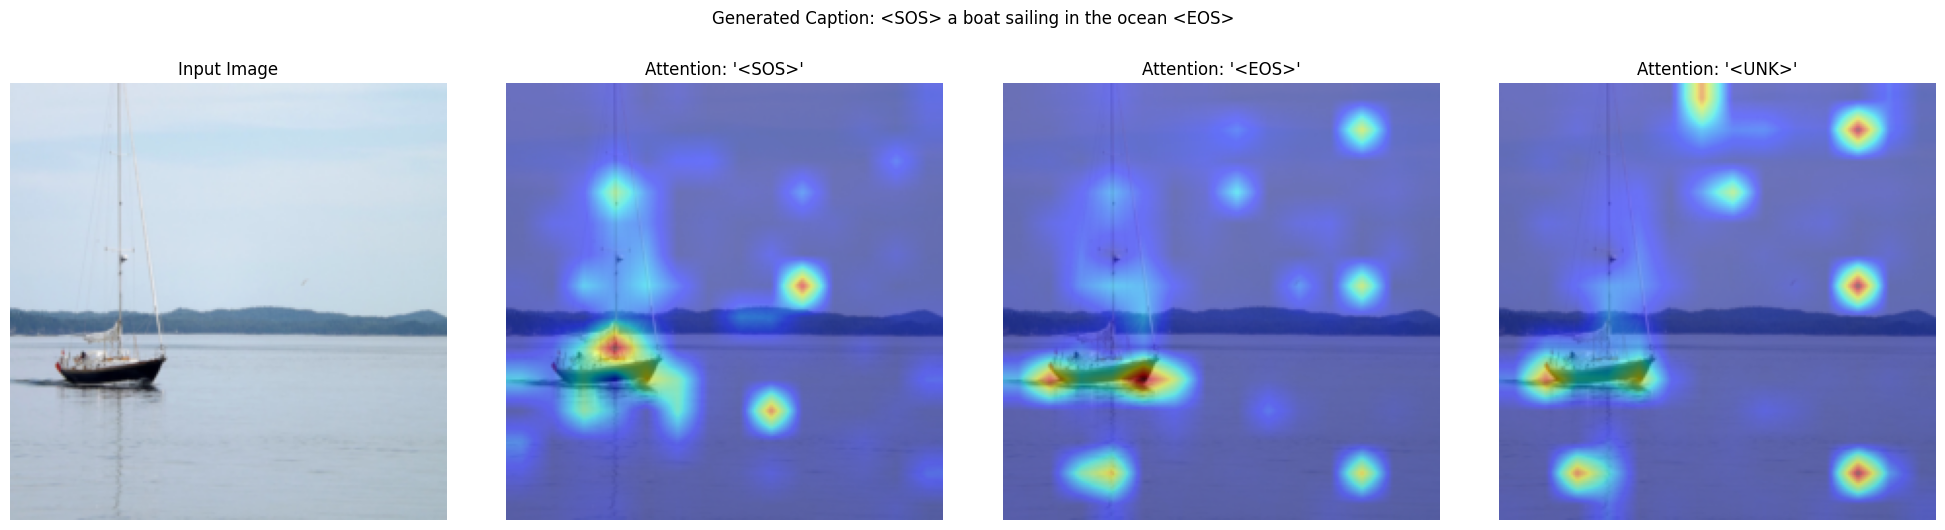

flickr8k/test_examples/boat.png: <SOS> a boat sailing in the ocean <EOS>


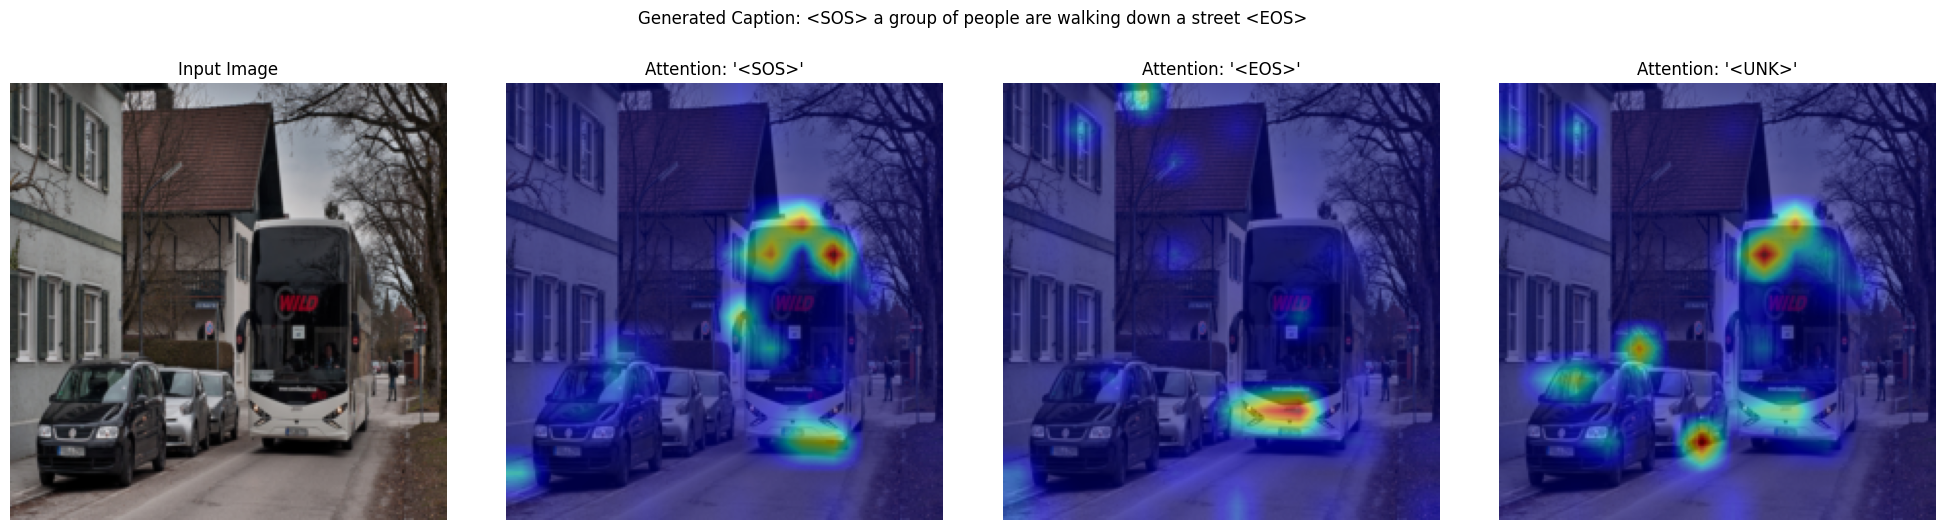

flickr8k/test_examples/bus.png: <SOS> a group of people are walking down a street <EOS>


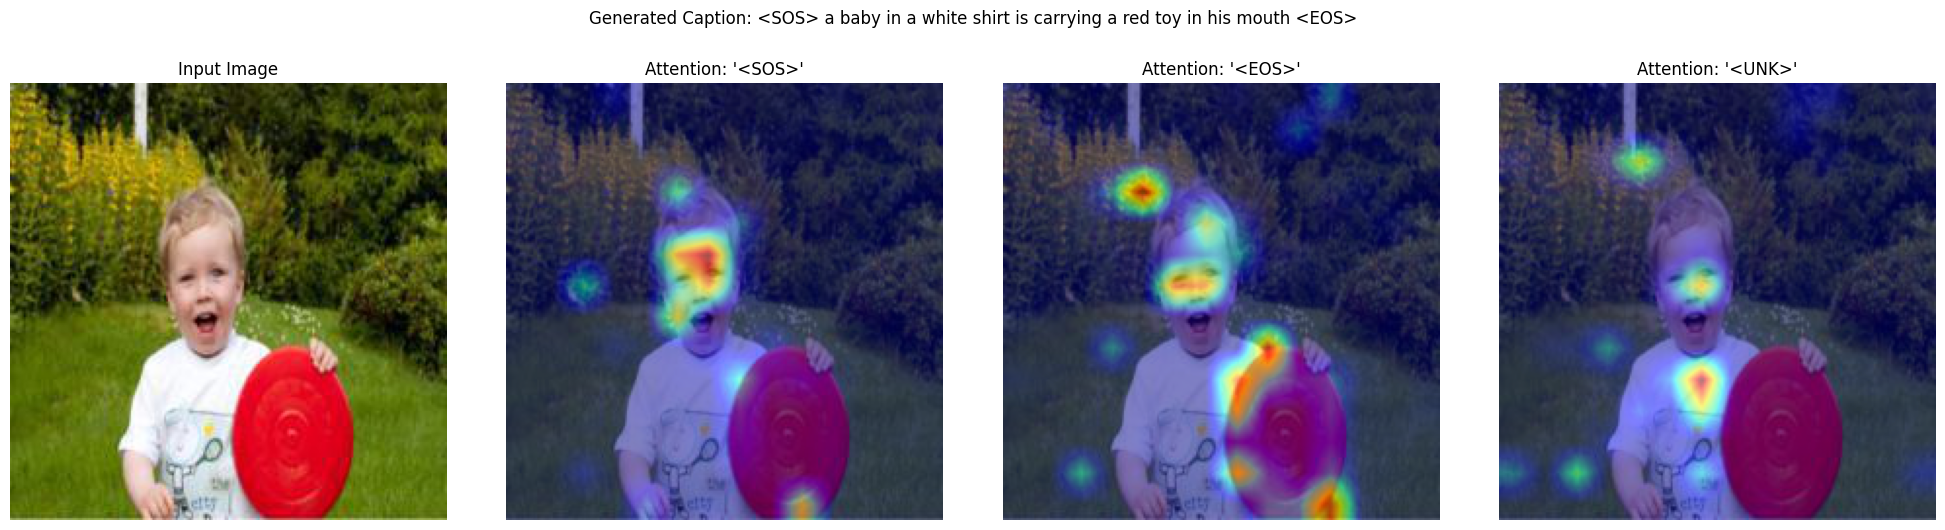

flickr8k/test_examples/child.jpg: <SOS> a baby in a white shirt is carrying a red toy in his mouth <EOS>


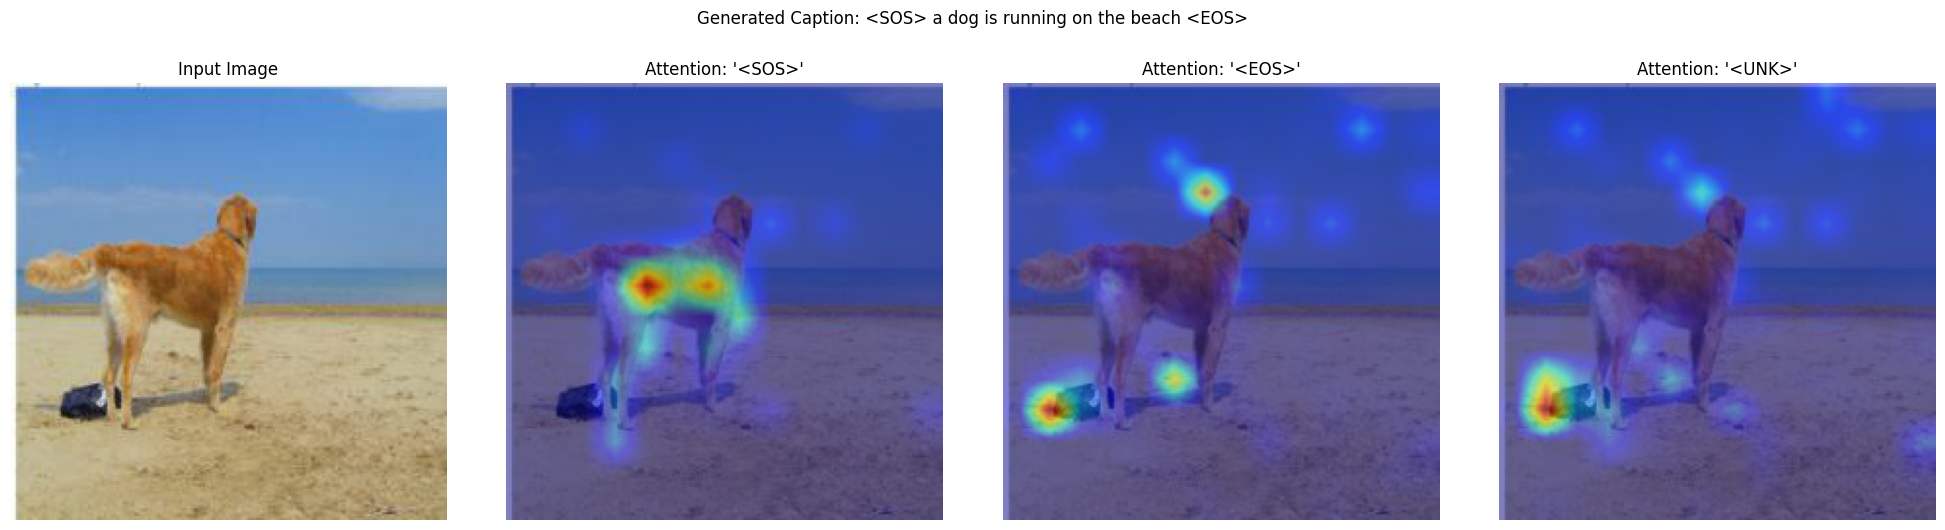

flickr8k/test_examples/dog.jpg: <SOS> a dog is running on the beach <EOS>


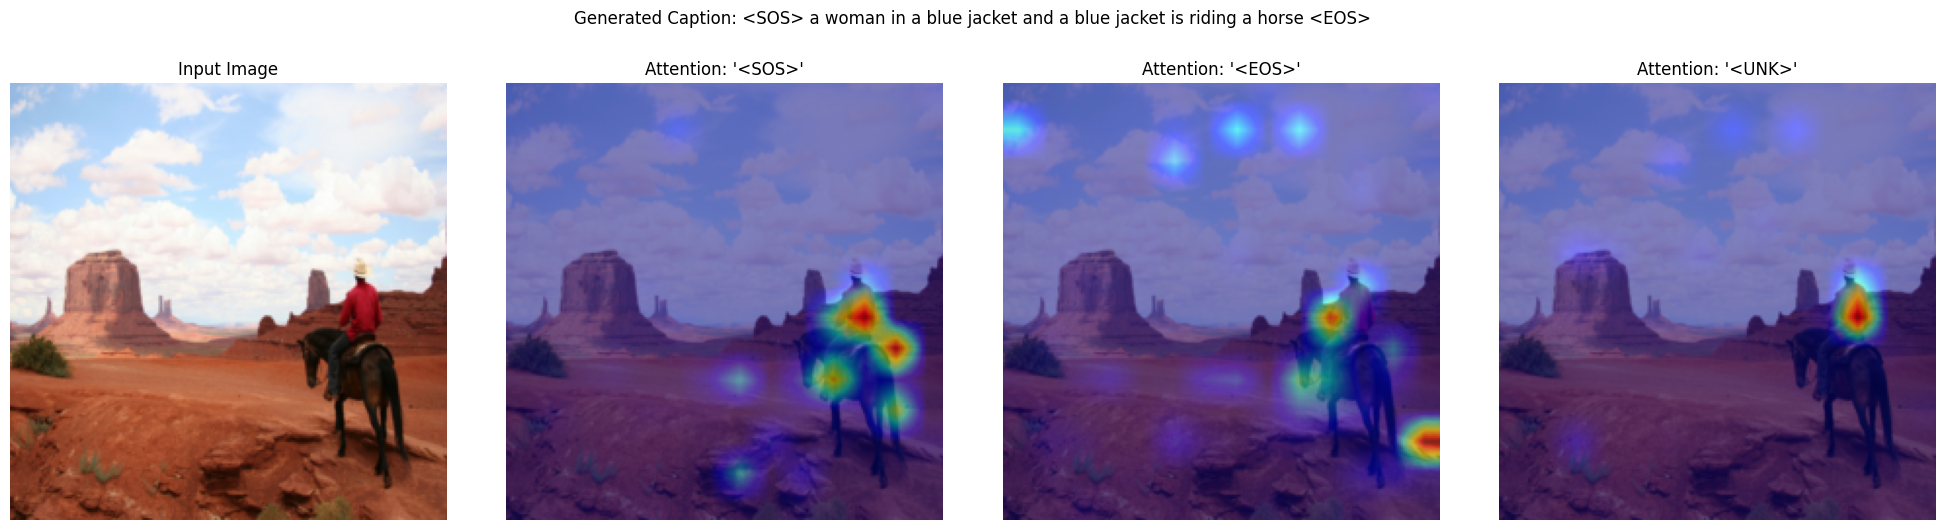

flickr8k/test_examples/horse.png: <SOS> a woman in a blue jacket and a blue jacket is riding a horse <EOS>


In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from models.model_6 import Model
from report_utils.visualize import generate_and_visualize
from data.vocabulary import Vocabulary  # Adjust as needed

vocab = Vocabulary("flickr8k/vocabulary_captions.txt")
model = Model(vocabulary=vocab)
checkpoint = torch.load("checkpoints/model_6/model.pth.tar", map_location="cpu")
model.load_state_dict(checkpoint["model_state_dict"])

sos_idx = vocab.to_index("<SOS>")
eos_idx = vocab.to_index("<EOS>")

test_images = [
    "flickr8k/test_examples/boat.png",
    "flickr8k/test_examples/bus.png",
    "flickr8k/test_examples/child.jpg",
    "flickr8k/test_examples/dog.jpg",
    "flickr8k/test_examples/horse.png"
]

for path in test_images:
    caption = generate_and_visualize(model, path, vocab, sos_idx, eos_idx)
    print(f"{path}: {caption}")


### Attention Visualization Analysis
Example: boat.png

Caption: <SOS> a boat is sailing in the ocean

Attention map overlays highlight the boat, ocean, and field as relevant patches.

- The attention maps of Model 6 clearly highlight image regions associated with predicted words.
- Words like "dog", "baby", "boat", "street" align well with corresponding regions in the image.
- This helps interpret and validate the model’s predictions, adding explainability.

summary: Model 6 not only performs the best quantitatively but also shows interpretable behavior. The attention maps confirm that the model correctly attends to important regions during generation. It perfectly focus the main objects in the picture but it has some issues in the vocabulary selection.

### Conclusion

Each model iteration introduced meaningful improvements. The final model demonstrates strong captioning capability, stable training, high BLEU scores, and visual interpretability through attention.

***Model 6 stands out as the best-performing model in this assignment, offering both accuracy and insight into its decision-making process.***